# Module 10: Logscale

In [222]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets
%matplotlib inline

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading.

Let's first create some ratios.

In [223]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference. **

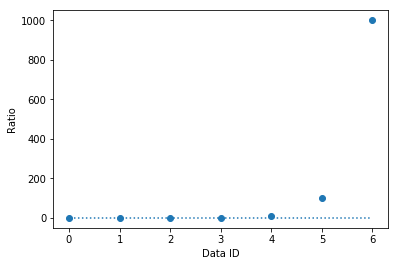

In [224]:

plt.scatter(range(0,7,1),ratio)
plt.ylabel("Ratio")
plt.xlabel("Data ID")
plt.axhline(y=1,xmin=0.05,xmax=0.95,ls='dotted')
plt.show()

**Q: Explain what's bad about this plot.**

Ratio above 1 is getting more emphasis then ratio less than 1.  

**Q: Can you fix it? **

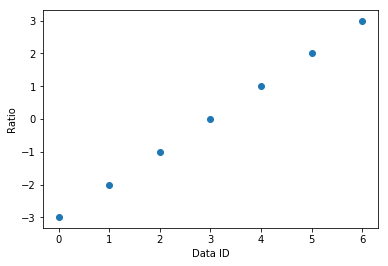

In [204]:
# Implement

plt.scatter(range(0,7,1),np.log10(ratio))
plt.ylabel("Ratio")
plt.xlabel("Data ID")
#plt.axhline(y=1,xmin=0.05,xmax=0.95,ls='dotted')
plt.show()

## Log-binning

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail. 

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following three columns: `IMDB_Rating`, `IMDB_Votes`, `Rotten_Tomatoes_Rating`. **

In [205]:
# Implement
movies = vega_datasets.data.movies()
print(movies.shape[0])
movies.dropna(subset=('IMDB_Rating','IMDB_Votes','Rotten_Tomatoes_Rating'),inplace=True)
print(movies.shape[0])

3201
2260


If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each. 

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed. **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C558E8278>,
      dtype=object)

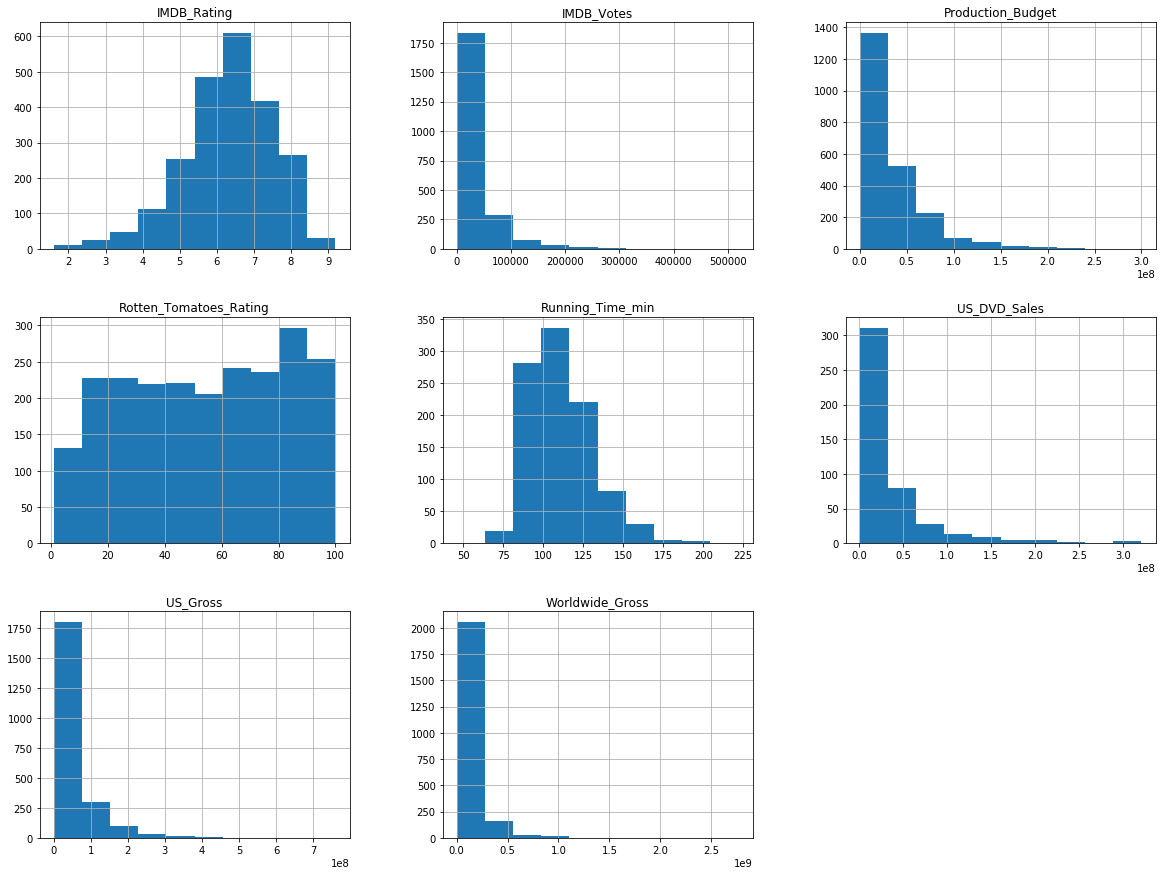

In [206]:
# Implement

movies.hist(figsize=(20,15))

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

**Q: Play with the number of bins, and then increase the number of bins to 200. **

Text(0.5,0,'World wide gross')

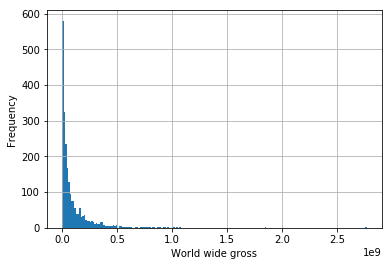

In [225]:
# Implement

ax= movies.Worldwide_Gross.hist(bins=200)
ax.set_ylabel("Frequency")
ax.set_xlabel("World wide gross")

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. 

**Q: How about changing the vertical scale to logarithmic scale?**

Text(0.5,0,'World wide gross')

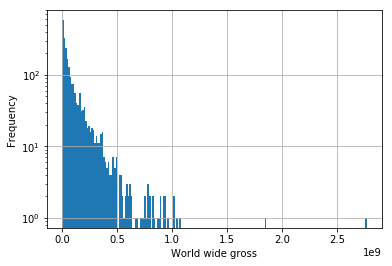

In [226]:
# Implement
ax= movies.Worldwide_Gross.hist(bins=200)
ax.set_ylabel("Frequency")
ax.set_yscale('log')
ax.set_xlabel("World wide gross")

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


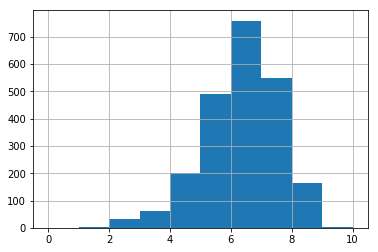

In [227]:
movies.IMDB_Rating.hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python+log-bin&pws=0)
* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min(Worldwide_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide_Gross)})$

In [228]:
min(movies.Worldwide_Gross)

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [229]:
movies.Worldwide_Gross = movies.Worldwide_Gross+1.0

In [230]:
min(movies.Worldwide_Gross)

1.0

**Q: now create logarithmic bins. Create 20 bins from the minimum value to the maximum value.**

In [231]:
# Implement
start=np.log10(min(movies.Worldwide_Gross))
stop = np.log10(max(movies.Worldwide_Gross))

bins= np.logspace(start,stop,20)
bins

array([1.00000000e+00, 3.14018485e+00, 9.86076088e+00, 3.09646119e+01,
       9.72346052e+01, 3.05334634e+02, 9.58807191e+02, 3.01083182e+03,
       9.45456845e+03, 2.96890926e+04, 9.32292387e+04, 2.92757043e+05,
       9.19311230e+05, 2.88680720e+06, 9.06510822e+06, 2.84661155e+07,
       8.93888645e+07, 2.80697558e+08, 8.81442219e+08, 2.76789150e+09])

Now we can plot a histgram with log-bin. Set both axis to be log-scale. 

Text(0,0.5,'Frequency')

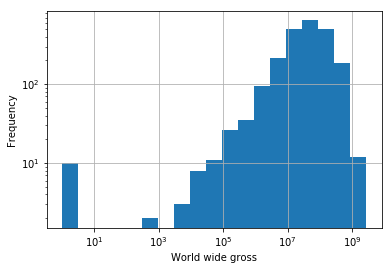

In [232]:
# Implement
ax=movies.Worldwide_Gross.hist(bins=bins,log=True)
ax.set_xscale("log")
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")


What is going on? Is this the right plot?

**Q: explain and fix**

Frequency on the y axis is not matching the data , lower gross is showing lower frequency , which is not the case.
Following the fixed plot. 

Text(0,0.5,'Frequency')

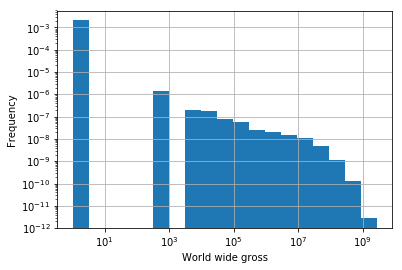

In [233]:
# Implement
ax=movies.Worldwide_Gross.hist(bins=bins,density=True)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

**Q: Can you explain the plot? Why are there gaps?**

The plot follows Benford's law , gaps are due to the log scale , if we remove log scale the chart become continuos. 

## CCDF

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. We have done CDF before. It's just a small change to that code. 

**Q: Draw a CCDF in log-log scale**

Text(0,0.5,'CCDF')

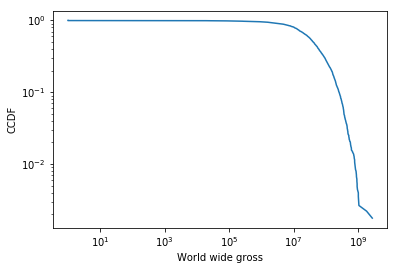

In [234]:
# implement 
import matplotlib.pyplot as plt

wwg = movies.Worldwide_Gross.sort_values();
n=len(wwg)
plt.plot(wwg,1-np.linspace(0.0,1.0,num=n))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('World wide gross')
plt.ylabel('CCDF')


We can also try in semilog scale (only one axis is in a log-scale), where the horizontal axis is linear. 

**Q: Draw a CCDF in semilog scale**

Text(0,0.5,'CCDF')

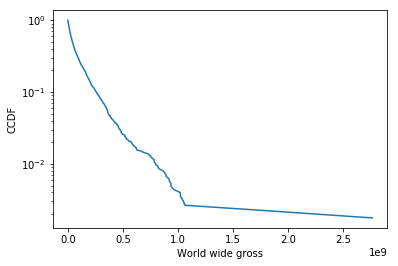

In [217]:
# Implement
wwg = movies.Worldwide_Gross.sort_values();
n=len(wwg)
plt.plot(wwg,1-np.linspace(0.0,1.0,num=n))
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('World wide gross')
plt.ylabel('CCDF')

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money. 

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html or `iloc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html 

Which one should you use, `loc` or `iloc`? How are they different from each other?

In [218]:
# Implement
movies = vega_datasets.data.movies()
movies.dropna(subset=('IMDB_Rating','IMDB_Votes','Rotten_Tomatoes_Rating'),inplace=True)
movies.Worldwide_Gross.idxmax()

1234

In [219]:
movies.loc[movies['Worldwide_Gross']==  movies.Worldwide_Gross.max()] 


,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
1234,Science Fiction,James Cameron,20th Century Fox,8.3,261439.0,PG-13,Action,237000000.0,18-Dec-09,83.0,NaN,Original Screenplay,Avatar,146153933.0,760167650.0,2.767891e+09


In [220]:
movies.iloc[1234]

Creative_Type             Contemporary Fiction
Director                        Garry Marshall
Distributor                          Universal
IMDB_Rating                                5.8
IMDB_Votes                               10902
MPAA_Rating                                  R
Major_Genre                              Drama
Production_Budget                        2e+07
Release_Date                         11-May-07
Rotten_Tomatoes_Rating                      17
Running_Time_min                           111
Source                     Original Screenplay
Title                             Georgia Rule
US_DVD_Sales                       1.93823e+07
US_Gross                           1.88829e+07
Worldwide_Gross                    2.08196e+07
Name: 1808, dtype: object

In [221]:
movies.loc[1234]

Creative_Type                 Science Fiction
Director                        James Cameron
Distributor                  20th Century Fox
IMDB_Rating                               8.3
IMDB_Votes                             261439
MPAA_Rating                             PG-13
Major_Genre                            Action
Production_Budget                    2.37e+08
Release_Date                        18-Dec-09
Rotten_Tomatoes_Rating                     83
Running_Time_min                          NaN
Source                    Original Screenplay
Title                                  Avatar
US_DVD_Sales                      1.46154e+08
US_Gross                          7.60168e+08
Worldwide_Gross                   2.76789e+09
Name: 1234, dtype: object

We need to use .loc here as we have changes the initial data frame by dropping NAs. 
The position 1234 is different then index 1234, so we need to use .loc here. 